# Modeling of the crisis processes

## Forecasting Financial Crises

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Download stock market data (e.g., S&P 500 as a proxy for the overall market)
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2023-01-01')
sp500_data['Return'] = sp500_data['Adj Close'].pct_change()  # Calculate daily returns

# Download bond yield data (as an economic indicator)
bond_yield_data = yf.download('^TNX', start='2000-01-01', end='2023-01-01')  # 10-year Treasury yield
bond_yield_data['Yield'] = bond_yield_data['Adj Close']

# Merge datasets by date
data = sp500_data[['Return']].merge(bond_yield_data[['Yield']], left_index=True, right_index=True)
data.dropna(inplace=True)  # Remove rows with missing values

sp500_data[:50]

We need to define what constitutes a financial crisis. A common approach is to flag periods of extreme market downturns, where stock market returns drop significantly over a short period.

0    5761
1      19
Name: Crisis, dtype: int64


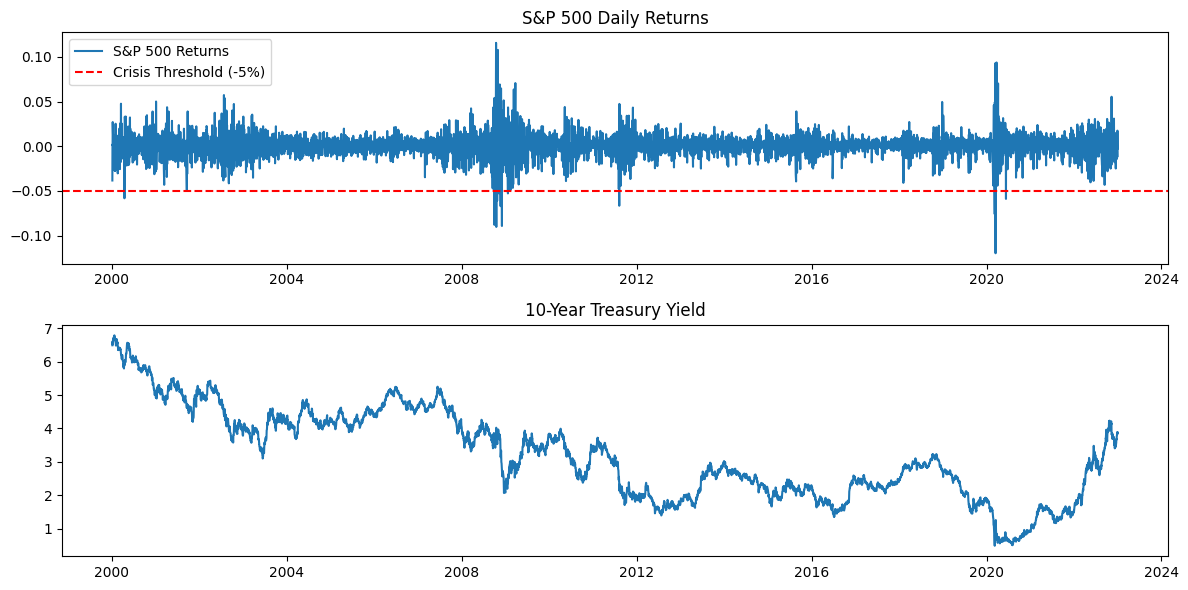

In [5]:
# Define a crisis if the return drops below a certain threshold (e.g., -5% in one day)
data['Crisis'] = (data['Return'] < -0.05).astype(int)

# Check the distribution of crisis events
print(data['Crisis'].value_counts())

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Return'], label='S&P 500 Returns')
plt.axhline(y=-0.05, color='r', linestyle='--', label='Crisis Threshold (-5%)')
plt.legend()
plt.title('S&P 500 Daily Returns')

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Yield'], label='10-Year Treasury Yield')
plt.title('10-Year Treasury Yield')
plt.tight_layout()
plt.show()

We will split the data into training and testing sets to evaluate the performance of our model.

In [6]:
# Define features (economic indicators) and target (Crisis label)
X = data[['Return', 'Yield']]
y = data['Crisis']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

We’ll use a RandomForestClassifier to model the relationship between the economic indicators and crisis events.

In [7]:
# Build a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

After training the model, we evaluate its performance using a confusion matrix and classification report.

[[1151    0]
 [   0    5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1151
           1       1.00      1.00      1.00         5

    accuracy                           1.00      1156
   macro avg       1.00      1.00      1.00      1156
weighted avg       1.00      1.00      1.00      1156



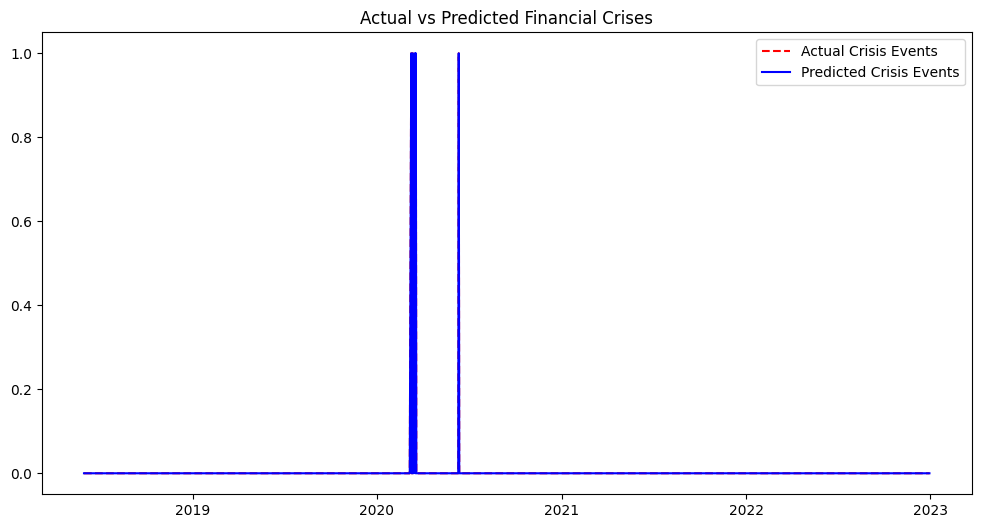

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Display confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the predicted vs actual crises
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Crisis Events', color='r', linestyle='--')
plt.plot(y_test.index, y_pred, label='Predicted Crisis Events', color='b')
plt.title('Actual vs Predicted Financial Crises')
plt.legend()
plt.show()

## Epidemic expansion modelling

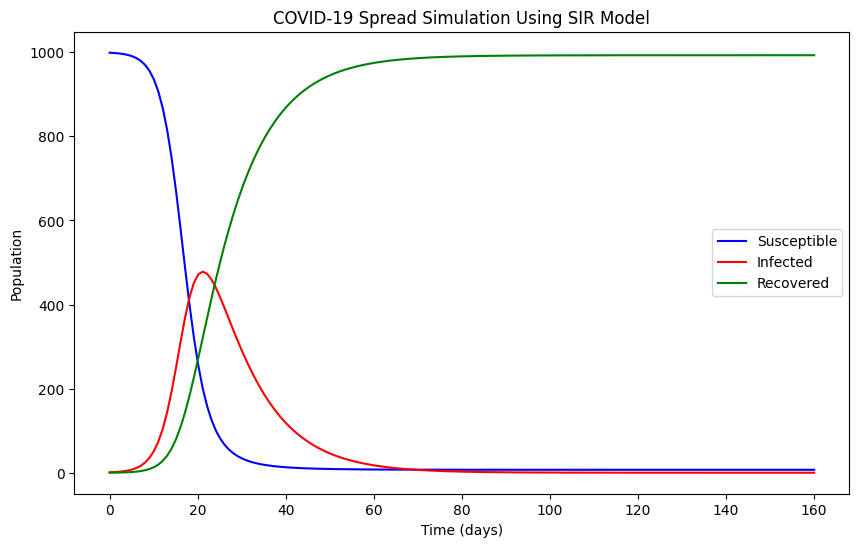

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters for the SIR model
N = 1000         # Total population
I0 = 1           # Initial number of infected individuals
R0 = 0           # Initial number of recovered individuals
S0 = N - I0 - R0 # Initial number of susceptible individuals
beta = 0.5       # Infection rate
gamma = 0.1      # Recovery rate

# Time points (days)
t = np.linspace(0, 160, 160)

# SIR model differential equations
def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t
ret = odeint(sir_model, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('COVID-19 Spread Simulation Using SIR Model')
plt.legend()
plt.show()

## test